In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

In [4]:
df = pd.read_csv('volleyball_raw.csv')
df.columns

Index(['경기번호', '팀명', '경기날짜', '결과', 'No.', '이름', '출전세트_1set', '출전세트_2set',
       '출전세트_3set', '출전세트_4set', '출전세트_5set', '득점_득점', '공격종합_시도', '공격종합_성공',
       '공격종합_공격차단', '공격종합_범실', '공격종합_성공률', '공격종합_점유율', '오픈_시도', '오픈_성공',
       '오픈_공격차단', '오픈_범실', '오픈_성공률', '오픈_점유율', '시간차_시도', '시간차_성공', '시간차_공격차단',
       '시간차_범실', '시간차_성공률', '시간차_점유율', '이동_시도', '이동_성공', '이동_공격차단', '이동_범실',
       '이동_성공률', '이동_점유율', '후위_시도', '후위_성공', '후위_공격차단', '후위_범실', '후위_성공률',
       '후위_점유율', '속공_시도', '속공_성공', '속공_공격차단', '속공_범실', '속공_성공률', '속공_점유율',
       '퀵오픈_시도', '퀵오픈_성공', '퀵오픈_공격차단', '퀵오픈_범실', '퀵오픈_성공률', '퀵오픈_점유율', '서브_시도',
       '서브_성공', '서브_범실', '서브_성공률', '서브_점유율', '디그_시도', '디그_성공', '디그_실패',
       '디그_범실', '디그_세트당', '디그_점유율', '세트_시도', '세트_성공', '세트_범실', '세트_세트당',
       '세트_점유율', '리시브_시도', '리시브_정확', '리시브_실패', '리시브_세트당', '리시브_점유율', '블로킹_시도',
       '블로킹_성공', '블로킹_유효블락', '블로킹_실패', '블로킹_범실', '블로킹_세트당', '블로킹_점유율',
       '블로킹_어시스트', '벌칙_벌칙', '범실_범실'],
      dtype='object')

### 전처리 과정

In [5]:
# No. 열 삭제
df_sub = df.drop('No.', axis = 1)
df_sub

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,...,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,...,20,3,5,6,1,0.6,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,...,10,0,7,3,0,0.0,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,...,14,4,6,3,0,0.8,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,...,12,2,2,7,0,0.4,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,...,28,1,13,9,0,0.2,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,474,KGC인삼공사,2022-02-28,0,김혜원 (S),O,NaN,2,NaN,NaN,...,2,0,1,1,0,0.0,4.44,0,0,0
10993,474,KGC인삼공사,2022-02-28,0,나현수 (C),NaN,17,12,NaN,NaN,...,1,0,0,1,0,0.0,2.22,0,0,2
10994,474,KGC인삼공사,2022-02-28,0,노란 (Li),LI,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0.00,0,0,0
10995,474,KGC인삼공사,2022-02-28,0,이선우 (L),NaN,2,1,NaN,NaN,...,0,0,0,0,0,0.0,0.00,0,0,0


In [6]:
# 3경기 이상 출전한 선수만 유지 (출전 세트 결측치가 3개 이상인 선수 제거)
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

# thresh = 3 : 정상 값(Not NaN)이 3개 이상만 유지
df_sub = df_sub.dropna(subset = subset, thresh = 3)
df_sub

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,...,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,...,20,3,5,6,1,0.60,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,...,10,0,7,3,0,0.00,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,...,14,4,6,3,0,0.80,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,...,12,2,2,7,0,0.40,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,...,28,1,13,9,0,0.20,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,...,14,2,5,5,0,0.67,31.11,2,0,0
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,...,2,0,0,2,0,0.00,4.44,3,0,0
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,...,0,0,0,0,0,0.00,0.00,0,0,1
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,...,4,0,2,1,0,0.00,8.89,2,0,0


In [7]:
# 스타팅멤버 표시 (3세트 이상 스타팅멤버라면 1 아니면 0)
df_sub['스타팅멤버'] = 0


df_sub.loc[(df_sub.iloc[:, 5:10] == 'O').sum(axis = 1) >= 3, '스타팅멤버'] = 1

df_sub

C:\Users\ice_9\AppData\Local\Temp\ipykernel_20216\2433339756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['스타팅멤버'] = 0


,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,...,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,...,3,5,6,1,0.60,21.28,1,0,7,1
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,...,0,7,3,0,0.00,10.64,0,0,6,1
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,...,4,6,3,0,0.80,14.89,1,0,6,1
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,...,2,2,7,0,0.40,12.77,3,0,1,1
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,...,1,13,9,0,0.20,29.79,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,...,2,5,5,0,0.67,31.11,2,0,0,1
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,...,0,0,2,0,0.00,4.44,3,0,0,1
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,...,0,0,0,0,0.00,0.00,0,0,1,0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,...,0,2,1,0,0.00,8.89,2,0,0,0


In [8]:
df_sub['스타팅멤버'].value_counts()

1    5315
0    2801
Name: 스타팅멤버, dtype: int64

#### 경기가 몇 세트를 했는지 찾기....?

In [9]:
# 경기번호에 대한 행의 갯수와 NaN값 비교
# 4세트 NaN값과 행의 갯수가 같으면 3세트만 진행한 것, 5세트 NaN값과 행의 갯수가 같으면 4세트만 진행한 것, 나머지는 5세트 모두 진행한 것
# 경기번호는 1~474까지 있으므로 range범위 지정

for i in range(1, 475):
    temp = df_sub['경기번호']== i
    if len(df_sub.loc[temp]) == df_sub.loc[temp]['출전세트_4set'].isna().sum():
        df_sub.loc[temp, '세트수'] = 3
    elif len(df_sub.loc[temp]) == df_sub.loc[temp]['출전세트_5set'].isna().sum():
        df_sub.loc[temp, '세트수'] = 4
    else:
        df_sub.loc[temp, '세트수'] = 5

display(df_sub['세트수'].value_counts())
df_sub

C:\Users\ice_9\AppData\Local\Temp\ipykernel_20216\200668905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[temp, '세트수'] = 5


3.0    3012
4.0    2740
5.0    2364
Name: 세트수, dtype: int64

,경기번호,팀명,경기날짜,결과,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,출전세트_5set,...,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,세트수
0,1,IBK기업은행,2017-10-14,0,메디 (L),O,O,O,O,O,...,5,6,1,0.60,21.28,1,0,7,1,5.0
1,1,IBK기업은행,2017-10-14,0,고예림 (L),O,O,O,O,O,...,7,3,0,0.00,10.64,0,0,6,1,5.0
2,1,IBK기업은행,2017-10-14,0,김희진 (R),O,O,O,O,O,...,6,3,0,0.80,14.89,1,0,6,1,5.0
3,1,IBK기업은행,2017-10-14,0,김미연 (L),O,O,O,O,O,...,2,7,0,0.40,12.77,3,0,1,1,5.0
4,1,IBK기업은행,2017-10-14,0,김수지 (C),O,O,O,O,O,...,13,9,0,0.20,29.79,2,0,3,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),O,O,O,NaN,NaN,...,5,5,0,0.67,31.11,2,0,0,1,3.0
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),O,O,O,NaN,NaN,...,0,2,0,0.00,4.44,3,0,0,1,3.0
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),12,11,11,NaN,NaN,...,0,0,0,0.00,0.00,0,0,1,0,3.0
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),14,O,O,NaN,NaN,...,2,1,0,0.00,8.89,2,0,0,0,3.0


In [10]:
# 세트수 타입 float64 => int64 변경
df_sub['세트수'] = df_sub['세트수'].astype('int64')
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8116 entries, 0 to 10996
Data columns (total 86 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   경기번호       8116 non-null   int64  
 1   팀명         8116 non-null   object 
 2   경기날짜       8116 non-null   object 
 3   결과         8116 non-null   int64  
 4   이름         8116 non-null   object 
 5   출전세트_1set  7791 non-null   object 
 6   출전세트_2set  7911 non-null   object 
 7   출전세트_3set  7896 non-null   object 
 8   출전세트_4set  4756 non-null   object 
 9   출전세트_5set  2124 non-null   object 
 10  득점_득점      8116 non-null   int64  
 11  공격종합_시도    8116 non-null   int64  
 12  공격종합_성공    8116 non-null   int64  
 13  공격종합_공격차단  8116 non-null   int64  
 14  공격종합_범실    8116 non-null   int64  
 15  공격종합_성공률   8116 non-null   float64
 16  공격종합_점유율   8116 non-null   float64
 17  오픈_시도      8116 non-null   int64  
 18  오픈_성공      8116 non-null   int64  
 19  오픈_공격차단    8116 non-null   int64  
 20  오픈_범실  

C:\Users\ice_9\AppData\Local\Temp\ipykernel_20216\1882691837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['세트수'] = df_sub['세트수'].astype('int64')


In [11]:
# 출전 세트 열 삭제
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

df_sub = df_sub.drop(subset, axis = 1)
df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,세트수
0,1,IBK기업은행,2017-10-14,0,메디 (L),24,67,20,4,2,...,5,6,1,0.60,21.28,1,0,7,1,5
1,1,IBK기업은행,2017-10-14,0,고예림 (L),15,40,12,6,4,...,7,3,0,0.00,10.64,0,0,6,1,5
2,1,IBK기업은행,2017-10-14,0,김희진 (R),15,36,10,2,2,...,6,3,0,0.80,14.89,1,0,6,1,5
3,1,IBK기업은행,2017-10-14,0,김미연 (L),7,16,5,1,0,...,2,7,0,0.40,12.77,3,0,1,1,5
4,1,IBK기업은행,2017-10-14,0,김수지 (C),6,16,4,1,2,...,13,9,0,0.20,29.79,2,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이 (C),4,7,2,2,0,...,5,5,0,0.67,31.11,2,0,0,1,3
10989,474,KGC인삼공사,2022-02-28,0,정호영 (C),3,5,3,1,0,...,0,2,0,0.00,4.44,3,0,0,1,3
10990,474,KGC인삼공사,2022-02-28,0,고의정 (L),1,3,0,0,0,...,0,0,0,0.00,0.00,0,0,1,0,3
10991,474,KGC인삼공사,2022-02-28,0,하효림 (S),1,0,0,0,0,...,2,1,0,0.00,8.89,2,0,0,0,3


In [12]:
# 이름과 포지션 분리하기
# "이름" 열 : 이름 정보
# "포지션" 열 : 포지션 정보

df_sub['포지션'] = df_sub['이름'].str.split().str[1].str.strip('()')
df_sub['이름'] = df_sub['이름'].str.split().str[0]

df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,세트수,포지션
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,...,6,1,0.60,21.28,1,0,7,1,5,L
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,...,3,0,0.00,10.64,0,0,6,1,5,L
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,...,3,0,0.80,14.89,1,0,6,1,5,R
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,...,7,0,0.40,12.77,3,0,1,1,5,L
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,...,9,0,0.20,29.79,2,0,3,1,5,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,...,5,0,0.67,31.11,2,0,0,1,3,C
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,...,2,0,0.00,4.44,3,0,0,1,3,C
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,...,0,0,0.00,0.00,0,0,1,0,3,L
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,...,1,0,0.00,8.89,2,0,0,0,3,S


In [13]:
# 선수 별 득점 점유율 구하기 (개인 별 득점을 팀 전체의 득점으로 나누기)

df_sub_total_score = df_sub['득점_득점'].sum()
df_sub['득점점유율'] = df_sub['득점_득점'] / df_sub_total_score
df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,스타팅멤버,세트수,포지션,득점점유율
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,...,1,0.60,21.28,1,0,7,1,5,L,0.000401
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,...,0,0.00,10.64,0,0,6,1,5,L,0.000251
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,...,0,0.80,14.89,1,0,6,1,5,R,0.000251
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,...,0,0.40,12.77,3,0,1,1,5,L,0.000117
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,...,0,0.20,29.79,2,0,3,1,5,C,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,...,0,0.67,31.11,2,0,0,1,3,C,0.000067
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,...,0,0.00,4.44,3,0,0,1,3,C,0.000050
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,...,0,0.00,0.00,0,0,1,0,3,L,0.000017
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,...,0,0.00,8.89,2,0,0,0,3,S,0.000017


#### 공격 효율 지표 추가 : 소수점 2번째 자리까지

In [14]:
''' 선수 별
오픈 공격 효율 구하기 : (오픈_성공 - 오픈_공격차단 - 오픈_범실 / 오픈_시도)
시간차 공격 효율 구하기 : (시간차_성공 - 시간차_공격차단 - 시간차_범실 / 시간차_시도)
이동 효율 구하기 : (이동_성공 - 이동_공격차단 - 이동_범실 / 이동_시도)
후위 효율 구하기 : (후위_성공 - 후위_공격차단 - 후위_범실 / 후위_시도)
속공 효율 구하기 : (속공_성공 - 속공_공격차단 - 속공_범실 / 속공_시도)
퀵오픈 효율 구하기 : (퀵오픈_성공 - 퀵오픈_공격차단 - 퀵오픈_범실 / 퀵오픈_시도)
'''

df_sub['오픈_효율'] = round((df_sub['오픈_성공']-df_sub['오픈_공격차단']-df_sub['오픈_범실']) / df_sub['오픈_시도']*100, 2)
df_sub['시간차_효율'] = round((df_sub['시간차_성공']-df_sub['시간차_공격차단']-df_sub['시간차_범실']) / df_sub['시간차_시도']*100, 2)
df_sub['이동_효율'] = round((df_sub['이동_성공']-df_sub['이동_공격차단']-df_sub['이동_범실']) / df_sub['이동_시도']*100, 2)
df_sub['후위_효율'] = round((df_sub['후위_성공']-df_sub['후위_공격차단']-df_sub['후위_범실']) / df_sub['후위_시도']*100, 2)
df_sub['속공_효율'] = round((df_sub['속공_성공']-df_sub['속공_공격차단']-df_sub['속공_범실']) / df_sub['속공_시도']*100, 2)
df_sub['퀵오픈_효율'] = round((df_sub['퀵오픈_성공']-df_sub['퀵오픈_공격차단']-df_sub['퀵오픈_범실']) / df_sub['퀵오픈_시도']*100, 2)
df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,스타팅멤버,세트수,포지션,득점점유율,오픈_효율,시간차_효율,이동_효율,후위_효율,속공_효율,퀵오픈_효율
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,...,1,5,L,0.000401,17.07,100.00,NaN,0.00,NaN,36.36
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,...,1,5,L,0.000251,-24.00,NaN,NaN,NaN,NaN,53.33
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,...,1,5,R,0.000251,10.00,22.22,NaN,-11.11,NaN,50.00
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,...,1,5,L,0.000117,16.67,-100.00,33.33,NaN,0.00,60.00
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,...,1,5,C,0.000100,0.00,25.00,0.00,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,...,1,3,C,0.000067,-50.00,NaN,-50.00,NaN,66.67,NaN
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,...,1,3,C,0.000050,33.33,NaN,NaN,NaN,50.00,NaN
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,...,0,3,L,0.000017,0.00,NaN,NaN,NaN,NaN,0.00
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,...,0,3,S,0.000017,NaN,NaN,NaN,NaN,NaN,NaN


#### 수비 지표 추가 : 소수점 2번째 자리까지

In [15]:
''' 선수 별
디그 성공률 구하기 : 디그_성공/디그_시도
세트 성공률 구하기 : 세트_성공/세트_시도
리시브 성공률 구하기 : 리시브_정확/리시브_시도
블로킹 효율 구하기 : 블로킹_성공+블로킹_유효블락-블로킹_범실/블로킹_시도
'''
df_sub['디그_성공률'] = round(df_sub['디그_성공'] / df_sub['디그_시도'], 2)
df_sub['세트_성공률'] = round(df_sub['세트_성공'] / df_sub['세트_시도'], 2)
df_sub['리시브_성공률'] = round(df_sub['리시브_정확'] / df_sub['리시브_시도'], 2)
df_sub['블로킹_효율'] = round((df_sub['블로킹_성공'] + df_sub['블로킹_유효블락'] - df_sub['블로킹_범실']) / df_sub['블로킹_시도'], 2)
df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,오픈_효율,시간차_효율,이동_효율,후위_효율,속공_효율,퀵오픈_효율,디그_성공률,세트_성공률,리시브_성공률,블로킹_효율
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,...,17.07,100.00,NaN,0.00,NaN,36.36,0.83,0.00,0.39,0.35
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,...,-24.00,NaN,NaN,NaN,NaN,53.33,0.77,0.14,0.60,0.70
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,...,10.00,22.22,NaN,-11.11,NaN,50.00,0.92,0.00,NaN,0.71
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,...,16.67,-100.00,33.33,NaN,0.00,60.00,0.83,0.00,0.00,0.33
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,...,0.00,25.00,0.00,NaN,0.00,NaN,0.91,0.00,NaN,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,...,-50.00,NaN,-50.00,NaN,66.67,NaN,0.86,NaN,NaN,0.50
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,...,33.33,NaN,NaN,NaN,50.00,NaN,1.00,NaN,NaN,0.00
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,...,0.00,NaN,NaN,NaN,NaN,0.00,0.67,NaN,0.00,NaN
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.67,0.41,0.00,0.50


```
공격 / 수비 효율, 성공률 이 0 인 경우 : 공격 / 수비 시도는 있으나 성공, 공격 차단, 범실, 정확이 없는 경우
                                        or 계산식의 분자부분이 0이 되는 경우
공격 / 수비 효율, 성공률 이 NaN 인 경우 : 공격 / 수비 시도, 성공, 공격 차단, 범실, 정확 모두 없는 경우
```

In [16]:
# 공격 / 수비 효율, 성공률이 NaN 인 경우 0으로 변경

df_sub[['오픈_효율', '시간차_효율', '이동_효율', '속공_효율', '퀵오픈_효율',
    '디그_성공률', '세트_성공률', '리시브_성공률', '블로킹_효율']] = df_sub[['오픈_효율',
    '시간차_효율', '이동_효율', '속공_효율', '퀵오픈_효율', '디그_성공률', '세트_성공률',
    '리시브_성공률', '블로킹_효율']].fillna(0)
df_sub

,경기번호,팀명,경기날짜,결과,이름,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,...,오픈_효율,시간차_효율,이동_효율,후위_효율,속공_효율,퀵오픈_효율,디그_성공률,세트_성공률,리시브_성공률,블로킹_효율
0,1,IBK기업은행,2017-10-14,0,메디,24,67,20,4,2,...,17.07,100.00,0.00,0.00,0.00,36.36,0.83,0.00,0.39,0.35
1,1,IBK기업은행,2017-10-14,0,고예림,15,40,12,6,4,...,-24.00,0.00,0.00,NaN,0.00,53.33,0.77,0.14,0.60,0.70
2,1,IBK기업은행,2017-10-14,0,김희진,15,36,10,2,2,...,10.00,22.22,0.00,-11.11,0.00,50.00,0.92,0.00,0.00,0.71
3,1,IBK기업은행,2017-10-14,0,김미연,7,16,5,1,0,...,16.67,-100.00,33.33,NaN,0.00,60.00,0.83,0.00,0.00,0.33
4,1,IBK기업은행,2017-10-14,0,김수지,6,16,4,1,2,...,0.00,25.00,0.00,NaN,0.00,0.00,0.91,0.00,0.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,한송이,4,7,2,2,0,...,-50.00,0.00,-50.00,NaN,66.67,0.00,0.86,0.00,0.00,0.50
10989,474,KGC인삼공사,2022-02-28,0,정호영,3,5,3,1,0,...,33.33,0.00,0.00,NaN,50.00,0.00,1.00,0.00,0.00,0.00
10990,474,KGC인삼공사,2022-02-28,0,고의정,1,3,0,0,0,...,0.00,0.00,0.00,NaN,0.00,0.00,0.67,0.00,0.00,0.00
10991,474,KGC인삼공사,2022-02-28,0,하효림,1,0,0,0,0,...,0.00,0.00,0.00,NaN,0.00,0.00,0.67,0.41,0.00,0.50


In [17]:
# 컬럼 선택

columns = [
    '경기번호',
    '경기날짜',
    '팀명',
    '결과',
    '이름',
#     '득점_득점',
#     '공격종합_시도',
#     '공격종합_성공',
#     '공격종합_공격차단',
#     '공격종합_범실',
    '공격종합_성공률',
#     '공격종합_점유율',
#     '오픈_시도',
#     '오픈_성공',
#     '오픈_공격차단',
#     '오픈_범실',
    '오픈_성공률',
#     '오픈_점유율',
    '오픈_효율',
#     '시간차_시도',
#     '시간차_성공',
#     '시간차_공격차단',
#     '시간차_범실',
    '시간차_성공률',
#     '시간차_점유율',
    '시간차_효율',
#     '이동_시도',
#     '이동_성공',
#     '이동_공격차단',
#     '이동_범실',
    '이동_성공률',
#     '이동_점유율',
    '이동_효율',
#     '후위_시도',
#     '후위_성공',
#     '후위_공격차단',
#     '후위_범실',
    '후위_성공률',
#     '후위_점유율',
    '후위_효율',
#     '속공_시도',
#     '속공_성공',
#     '속공_공격차단',
#     '속공_범실',
    '속공_성공률',
#     '속공_점유율',
    '속공_효율',
#     '퀵오픈_시도',
#     '퀵오픈_성공',
#     '퀵오픈_공격차단',
#     '퀵오픈_범실',
    '퀵오픈_성공률',
#     '퀵오픈_점유율',
    '퀵오픈_효율',
#     '서브_시도',
#     '서브_성공',
    '서브_범실',
    '서브_성공률',
#     '서브_점유율',
#     '디그_시도',
#     '디그_성공',
#     '디그_실패',
#     '디그_범실',
#     '디그_세트당',
#     '디그_점유율',
    '디그_성공률',
#     '세트_시도',
#     '세트_성공',
#     '세트_범실',
#     '세트_세트당',
#     '세트_점유율',
    '세트_성공률',
#     '리시브_시도',
#     '리시브_정확',
#     '리시브_실패',
#     '리시브_세트당',
#     '리시브_점유율',
    '리시브_성공률',
#     '블로킹_시도',
#     '블로킹_성공',
#     '블로킹_유효블락',
#     '블로킹_실패',
#     '블로킹_범실',
#     '블로킹_세트당',
#     '블로킹_점유율',
#     '블로킹_어시스트',
    '블로킹_효율',
#     '벌칙_벌칙',
    '범실_범실',
    '포지션',
    '득점점유율',
    '스타팅멤버',
    '세트수'
]


df_sub = df_sub[columns]

df_sub

,경기번호,경기날짜,팀명,결과,이름,공격종합_성공률,오픈_성공률,오픈_효율,시간차_성공률,시간차_효율,...,서브_성공률,디그_성공률,세트_성공률,리시브_성공률,블로킹_효율,범실_범실,포지션,득점점유율,스타팅멤버,세트수
0,1,2017-10-14,IBK기업은행,0,메디,29.85,26.83,17.07,100.00,100.00,...,0.20,0.83,0.00,0.39,0.35,7,L,0.000401,1,5
1,1,2017-10-14,IBK기업은행,0,고예림,30.00,12.00,-24.00,0.00,0.00,...,0.60,0.77,0.14,0.60,0.70,6,L,0.000251,1,5
2,1,2017-10-14,IBK기업은행,0,김희진,27.78,20.00,10.00,44.44,22.22,...,0.20,0.92,0.00,0.00,0.71,6,R,0.000251,1,5
3,1,2017-10-14,IBK기업은행,0,김미연,31.25,16.67,16.67,0.00,-100.00,...,0.00,0.83,0.00,0.00,0.33,1,L,0.000117,1,5
4,1,2017-10-14,IBK기업은행,0,김수지,25.00,0.00,0.00,50.00,25.00,...,0.20,0.91,0.00,0.00,0.50,3,C,0.000100,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,2022-02-28,KGC인삼공사,0,한송이,28.57,0.00,-50.00,0.00,0.00,...,0.00,0.86,0.00,0.00,0.50,0,C,0.000067,1,3
10989,474,2022-02-28,KGC인삼공사,0,정호영,60.00,66.67,33.33,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0,C,0.000050,1,3
10990,474,2022-02-28,KGC인삼공사,0,고의정,0.00,0.00,0.00,0.00,0.00,...,0.33,0.67,0.00,0.00,0.00,1,L,0.000017,0,3
10991,474,2022-02-28,KGC인삼공사,0,하효림,0.00,0.00,0.00,0.00,0.00,...,0.33,0.67,0.41,0.00,0.50,0,S,0.000017,0,3


#### 홈 / 어웨이 추가

In [18]:
# 경기 번호, 팀명, 결과에 따른 팀원 전체의 평균 성공률, 효율
temp = df_sub.groupby(['경기번호', '팀명', '결과']).mean()

# 팀원 전체에 대한 평균으로 진행하므로 득점점유율과, 스타팅멤버 컬럼 제거
temp.drop(['득점점유율', '스타팅멤버'], 1, inplace=True)
temp.reset_index(inplace=True)
temp

C:\Users\ice_9\AppData\Local\Temp\ipykernel_20216\1552097474.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  temp.drop(['득점점유율', '스타팅멤버'], 1, inplace=True)


,경기번호,팀명,결과,공격종합_성공률,오픈_성공률,오픈_효율,시간차_성공률,시간차_효율,이동_성공률,이동_효율,...,퀵오픈_성공률,퀵오픈_효율,서브_범실,서브_성공률,디그_성공률,세트_성공률,리시브_성공률,블로킹_효율,범실_범실,세트수
0,1,IBK기업은행,0,17.985000,9.437500,-0.657500,24.305000,5.902500,7.291250,4.166250,...,26.931250,24.961250,1.250000,0.175000,0.857500,0.128750,0.162500,0.395000,3.125000,5.0
1,1,흥국생명,1,12.320000,6.898182,-3.912727,10.605455,10.605455,3.636364,1.818182,...,15.150909,13.636364,0.909091,0.127273,0.876364,0.203636,0.275455,0.507273,2.454545,5.0
2,2,KGC인삼공사,0,32.868889,35.226667,24.852222,3.703333,3.703333,2.777778,2.777778,...,12.036667,7.036667,0.444444,0.122222,0.846667,0.200000,0.297778,0.446667,1.444444,5.0
3,2,현대건설,1,20.770000,14.957778,11.331111,20.712222,18.490000,0.000000,0.000000,...,13.457778,12.602222,1.444444,0.111111,0.815556,0.158889,0.173333,0.308889,3.222222,5.0
4,3,GS칼텍스,1,27.587273,22.803636,15.679091,15.909091,15.909091,0.000000,0.000000,...,10.505455,7.139091,1.000000,0.163636,0.847273,0.200909,0.231818,0.350000,2.272727,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,흥국생명,0,23.755714,20.237143,5.634286,0.000000,0.000000,0.000000,-7.142857,...,20.271429,16.327143,0.285714,0.142857,0.828571,0.170000,0.095714,0.270000,2.142857,3.0
944,473,페퍼저축은행,0,21.275714,29.907143,24.785714,9.524286,9.524286,0.000000,0.000000,...,8.571429,8.571429,0.428571,0.047143,0.790000,0.081429,0.124286,0.338571,1.142857,3.0
945,473,한국도로공사,1,38.804286,33.334286,27.552857,20.000000,20.000000,14.285714,14.285714,...,26.957143,21.502857,1.000000,0.188571,0.852857,0.204286,0.408571,0.384286,1.428571,3.0
946,474,GS칼텍스,1,45.481250,31.101250,18.601250,12.500000,12.500000,12.500000,12.500000,...,20.936250,0.087500,0.750000,0.208750,0.833750,0.408750,0.302500,0.401250,0.875000,3.0


In [19]:
# 홈인 경우 1, 어웨이인 경우 0
# 전체를 홈이라고 지정 -> index가 홀수 인 경우(같은 경기번호에서 뒤에 있는 경우) 어웨이로 변경
temp['진영'] = 1
temp.loc[temp.index % 2 == 1, '진영'] = 0
temp

,경기번호,팀명,결과,공격종합_성공률,오픈_성공률,오픈_효율,시간차_성공률,시간차_효율,이동_성공률,이동_효율,...,퀵오픈_효율,서브_범실,서브_성공률,디그_성공률,세트_성공률,리시브_성공률,블로킹_효율,범실_범실,세트수,진영
0,1,IBK기업은행,0,17.985000,9.437500,-0.657500,24.305000,5.902500,7.291250,4.166250,...,24.961250,1.250000,0.175000,0.857500,0.128750,0.162500,0.395000,3.125000,5.0,1
1,1,흥국생명,1,12.320000,6.898182,-3.912727,10.605455,10.605455,3.636364,1.818182,...,13.636364,0.909091,0.127273,0.876364,0.203636,0.275455,0.507273,2.454545,5.0,0
2,2,KGC인삼공사,0,32.868889,35.226667,24.852222,3.703333,3.703333,2.777778,2.777778,...,7.036667,0.444444,0.122222,0.846667,0.200000,0.297778,0.446667,1.444444,5.0,1
3,2,현대건설,1,20.770000,14.957778,11.331111,20.712222,18.490000,0.000000,0.000000,...,12.602222,1.444444,0.111111,0.815556,0.158889,0.173333,0.308889,3.222222,5.0,0
4,3,GS칼텍스,1,27.587273,22.803636,15.679091,15.909091,15.909091,0.000000,0.000000,...,7.139091,1.000000,0.163636,0.847273,0.200909,0.231818,0.350000,2.272727,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,흥국생명,0,23.755714,20.237143,5.634286,0.000000,0.000000,0.000000,-7.142857,...,16.327143,0.285714,0.142857,0.828571,0.170000,0.095714,0.270000,2.142857,3.0,0
944,473,페퍼저축은행,0,21.275714,29.907143,24.785714,9.524286,9.524286,0.000000,0.000000,...,8.571429,0.428571,0.047143,0.790000,0.081429,0.124286,0.338571,1.142857,3.0,1
945,473,한국도로공사,1,38.804286,33.334286,27.552857,20.000000,20.000000,14.285714,14.285714,...,21.502857,1.000000,0.188571,0.852857,0.204286,0.408571,0.384286,1.428571,3.0,0
946,474,GS칼텍스,1,45.481250,31.101250,18.601250,12.500000,12.500000,12.500000,12.500000,...,0.087500,0.750000,0.208750,0.833750,0.408750,0.302500,0.401250,0.875000,3.0,1


In [20]:
df_team = temp[['경기번호', '팀명', '진영']]
df_team

,경기번호,팀명,진영
0,1,IBK기업은행,1
1,1,흥국생명,0
2,2,KGC인삼공사,1
3,2,현대건설,0
4,3,GS칼텍스,1
...,...,...,...
943,472,흥국생명,0
944,473,페퍼저축은행,1
945,473,한국도로공사,0
946,474,GS칼텍스,1


# 세트 수에 따른 팀별 승률

In [21]:
winning_rate = df_sub.groupby(['세트수','팀명'])[['결과']].mean()
winning_rate.columns=['승률']
winning_rate = winning_rate.reset_index()
winning_rate

,세트수,팀명,승률
0,3,GS칼텍스,0.752535
1,3,IBK기업은행,0.507605
2,3,KGC인삼공사,0.311015
3,3,페퍼저축은행,0.064103
4,3,한국도로공사,0.614849
5,3,현대건설,0.523596
6,3,흥국생명,0.532129
7,4,GS칼텍스,0.513627
8,4,IBK기업은행,0.386740
9,4,KGC인삼공사,0.421836


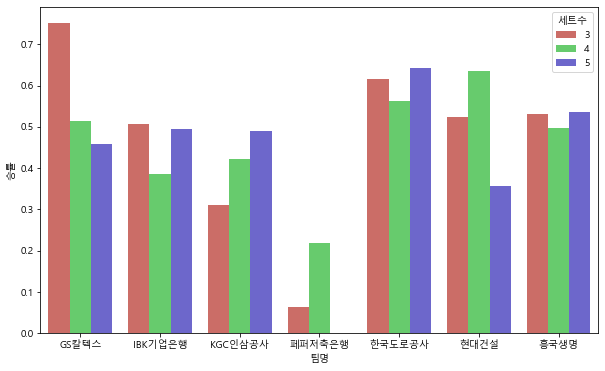

In [22]:
sns.barplot(x='팀명', y='승률', data=winning_rate, hue='세트수',palette = 'hls')
plt.show()

In [ ]:
#test